<div style="text-align: center; margin: 50px">

<h1 style="color: black; background-color: grey; text-align: center;">Cyber Week @IITR</h1>
<h3> A perspective to generalize NTRU variants </h3>
<h3>Prepared by: Ali Raya & Vikas Kumar </h3>
</div>


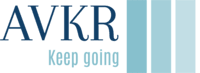

# Overview

1. [Introduction](#intro) <br>
    1.1 [Tutorial layout](#layout) <br>
2. [Steps of our experiment](#steps) <br>
    [Part A](#partA)<br>
    2.1 [Step 1: Introduce NTRU cryptosystem](#step1) <br>
        * [Key generation](#key) <br>
        * [Encryption](#enc) <br>
        * [Decryption](#dec)<br>
    [Part B](#partB)<br>
    2.2 [Step 2: Generalization to GR-NTRU](#step2)<br>
    2.3 [Step 3: Twisted GR-NTRU](#step3)<br>
    2.4 [Step 4: Towards specialization, again](#step4)!<br>
        * [GR-NTRU over dihedral group(DiTRU)](#Ditru)<br>
        * [Other examples](#examples)<br>



<a id="intro"></a>
### Introduction


**Lattice( Definition 1)**: Let $v_1, v_2, \ldots , v_n \in \mathbb{R}^m$ be a set of linearily independent vectors. 

The lattice $\mathcal{L}$ generated by $v_1, v_2, \ldots v_n$ is the set of linear combinations of $v_1, v_2, \ldots, v_n$ with coefficients in $\mathbb{Z}$.

$$\mathcal{L} = \{ a_1v_1 + a_2 v_2 + \ldots a_nv_n: a_1, a_2, \ldots a_n \in \mathbb{Z} \}$$

A basis for $\mathcal{L}$ is any set of independent vectors that generates $\mathcal{L}$.

For convenience, we denote the basis as a matrix $B$ of dimension $n \times m$, where the row $i$ in the matrix corresponds to the coefficients of the vector $i$ in the basis.

There are infinitely many bases to define a lattice with a dimension greater than 2.

Let $B$ and $B^\prime$ be two basis matrices for a lattice $\mathcal{L}$. Then $B^\prime = U B$ where $U$ is an $n \times n$ matrix such that $det(U)=\pm 1$.

**Lattice( Definition 2)**: a subset of $\mathbb{R}^m$ is a lattice if and only if it is a discrete additive subgroup.

Let $\mathcal{L}$ be a lattice in $\mathbb{R}^m$ of rank $n$ with basis matrix $B$. Then $det(\mathcal{L})= \sqrt{det(BB^T)}$. For a full rank lattice(i.e., $n=m$) $det(\mathcal{L})= |det(B)|$.


**Hard problems of lattices**

***The Shortest Vector Problem (SVP)***: Find a shortest nonzero vector in a lattice $\mathcal{L}$, i.e., find a nonzero vector $v \in \mathcal{L}$ that minimizes the Euclidean norm $\lVert v \rVert$.

***The Closet Vector Problem( CVP)***: Given a vector $w \in \mathbb{R}^m$ that is not in $\mathcal{L}$, find a vecotr $v \in \mathcal{L}$ that is the closet to $w$, i.e,. find a vector $v \in \mathcal{L}$ that minimizes the Euclidean norm $\lVert w-v \rVert$.

There are relaxed variants of the previous problems that don't ask for finding the shortest(the closest) vector ever, but the shortest(the closest) up to an approximation factor $\gamma$.

**Gaussian Heuristic (Definition)**: let $\mathcal{L} $ be a full rank lattice generated by the basis matrix $B$, then the gaussian expected length of a shortest vector $\mathcal{L}$ is 

$$\sigma({\mathcal{L}})= \sqrt{\frac{n}{2\pi e}}(det(\mathcal{L}))^{1/n}$$.

For detailed definitions and related results refer to an introduction to mathematical cryptography [chapter 6](https://link.springer.com/chapter/10.1007/978-0-387-77993-5_6)




<a id="partA"></a>
# Part A

## NTRU cryptosystem

The initial NTRU scheme is framed over the factor ring of a polynomial ring. In this tutorial, we give a simple description of the NTRU cryptosystem as described initialy in [chapter 6](https://link.springer.com/chapter/10.1007/978-0-387-77993-5_6)



<a id="layout"></a>

### Layout

In this tutorial, we aim to understand the NTRU cryptosystem as a lattice-based cryptosystem and 
its generalization to some related NTRU-like schemes.

For this purpose, we cover:
- A construction of NTRU as it was initially introduced in literature.
- GR-NTRU as a possible generalization of NTRU.
- Twisted GR-NTRU as a more generalized form.
- A construction of GR-NTRU over the dihedral group.
- Some other NTRU-like cryptosystems from quaternion algebra.

<a id="step1"></a>
## 2.1 Step 1: Introduction to NTRU cryptosystem

**Parameters selection**
Let $N, p, q, d$ be positive integers with $N, p$ prime, $p << q$, gcd$(N,q)=$ gcd$(p,q) = 1$, and $q>(6d+1)p$. 

Let $\mathcal{R} = {\mathbb{Z}[x]}/{(x^N-1)}$, $\mathcal{R}_q = {\mathbb{Z}_q[x]}/{(x^N-1)}$, and $\mathcal{R}_p = {\mathbb{Z}_p[x]}/{(x^N-1)}$.

For positive integers $d_1,d_2$, 
$$\mathcal{T}(d_1,d_2) =
   \left\{ f \in \mathcal{R}  \middle\vert \begin{array}{l}
    f~~\text{has $d_1$ coefficients equal to 1} \\
    f~~\text{has $d_2$ coefficients equal to -1} \\
    \text{rest coefficients are 0}
  \end{array}\right\}$$
  
  
We call polynomials from $\mathcal{T}(d_1,d_2)$ to be ternary polynomials. Suppose $f(x)\in \mathcal{R}_q$, then the centered lift of $f(x)$ is the unique polynomial $f^{\prime}(x)\in \mathcal{R}$ whose coefficients are in the interval $\left(-\frac{q}{2},\frac{q}{2}\right]$ and $f^{\prime}(x)\pmod q = f(x)$. 


Message space consists of elements from $\mathcal{R}$ whose coefficients are between $-\frac{p}{2}$ and $\frac{p}{2}$. In other words, a message is an element in $\mathcal{R}$ that is the centered lift of some element in $\mathcal{R}_p$.

<a id="key"></a>
### * Key generation

- Choose $f\in \mathcal{T}(d+1,d)$ such that there exist $f_q\in \mathcal{R}_q$, $f_p \in \mathcal{R}_p$ satisfying $f\star f_q \equiv 1\pmod q$ and $f \star f_p \equiv 1 \pmod p$. 
- Choose another element $g\in \mathcal{T}(d,d)$.
- construct $h\in\mathcal{R}_q$ such that $f \star h \equiv g \pmod q$.
- declare $h,p,q$ to be public key.
- $f$ and $f_p$ are private keys.


As we can see, finding the inverse involves inverting $f$ over $\mathcal{R_p}$ and $\mathcal{R_q}$.

For the NTRU ring, there are fast inversion algorithms like [Almost inverse algorithm](https://ntru.org/f/tr/tr014v1.pdf).

However, for simplicity and genarality, we first build the matrix corresponding to the element from the ring (in the case of the NTRU, it is a right circulant matrix) and then check whether the matrix is invertible. 

If the matrix is invertible, then the first row of the inverted matrix is precisely the inverse of the element.





In [1]:
from random import Random

In [2]:
def randomBitArray(seed, s):
    """
    Input: Integer s.
           seed: a randomly generated number.
           
    Output: Random bit array of length s.
    """
    random = Random()
    random.seed(seed)
    return [random.randrange(2) for i in range(s)]

In [3]:
def fixed_type(n, b, d1, d2):
    """
    Input: A bit array b of length sample_fixed_type_bits.
           n: the order of the group
    Output: A ternary polynomial with exactly d1 coefficients equal to 1 and d2  coefficients equal to −1.
    """
    A = [0] *n
    v = [0] *n
    i = 0
    while i < d1:
        A[i] = 1
        for j in range(30):
            A[i] += 2 ** (2 + j) * b[30 * i + j]
        i += 1
    while i < d1+d2:
        A[i] = 2
        for j in range(30):
            A[i] += 2 ** (2 + j) * b[30 * i + j]
        i += 1

    while i < n:
        for j in range(30):
            A[i] += 2 ** (2 + j) * b[30 * i + j]
        i += 1

    A.sort()

    for i in range(n):
        v[i] = A[i] % 4
        if v[i] ==2:
            v[i] =-1

    return v

In [4]:
def ternary(n, b):
    """
    Input: - b: A bit array b of length sample_iid_bits.
           - n: the order of the group
            
    Output: A ternary polynomial.

   """
    v = [0] *n

    for i in range(n):
        coeff_i = 0
        for j in range(8):
            coeff_i += 2 ^ j * b[8 * i + j]
        v[i] = coeff_i

    for i in range(n):
        v[i] = v[i]%3
        if v[i]==2:
            v[i]=-1
    return v


In [5]:
#Test the function
n = 11
bitstr = 8*n
seed = randint(0,2**64)
b= randomBitArray(seed,bitstr)
ternary(n,b)

[0, -1, -1, 0, 0, 0, 0, 0, 1, 0, 0]

In [6]:
def shiftLbyn(arr, n=0):
    """
     Auxiliary function
     Input: arr: an array , n: an integer 
     Output: shifting to left the array by n positions
    """
    return arr[n::] + arr[:n:]

In [7]:
def get_A(first_row, FF):
    """
    Matrix representation for an element of Z_qC_n (right circulant matrix)
    It's also an auxiliary matrix for matrix representation for an element in Z_qD_n
    Input: the first row that represents an element f,g, or h.
    FF: the space over it, the matrix to be constructed either IntegerModRing(3)
    or IntgerModRing(q)
    """

    n = len(first_row)
    a = first_row
    m = []
    for i in range(n):
        m.append(a)
        a = shiftLbyn(a, -1)

    MS2 = MatrixSpace(FF, n, n)
    A = MS2.matrix(m)

    return A



In [8]:
def element_to_matrix(first_row, FF):
    """
    For cyclic group, the matrix representation of an element is just
    the corresponding matrix to the element
    """
    return get_A(first_row, FF)

In [9]:
def get_q_no_error(d,p):
    """
    The function returns the value of q that gives no decryption failure for variant of NTRU
    Input: d = int(order of the group/3)
           p usually 3
    """
    value= p*(6*d+1)
    q= 2**(len(bin(value))-2)
    return q

In [10]:

def ZCn_multiply(n, element1, element2, mod):
    
    """
    Input:  -n: the order of the group
            -element1, element2: two elements representing two polynomials from the ring Z_mod[x]/(X^n-1)
            - mod: the mod of the multiplication
    Output: their multiplication
    """

    multi_result = [0] * n
    # ai*aj*ri*rj = ai*aj(r_(i+j)%n)
    for i in range(n):
        for j in range(n):
            multi_result[(i + j) % n] = (multi_result[(i + j) % n] + element1[i] * element2[
                j]) % mod  # ai*aj*ri*rj = ai*aj(r_(i+j))

    return multi_result

In [15]:
#Test the function
n = 11
p = 3
d = int(n/3)
q = get_q_no_error(d,p)
FFp = IntegerModRing(p)
FFq = IntegerModRing(q)


###### Sample f #####
## We repeat sampling f until, we get an invertible 
## element over R_p and R_q
while(1):
    bitstr = 30*n
    seed = randint(0,2**64)
    b= randomBitArray(seed,bitstr)
    f = fixed_type(n,b,d+1,d)
    Fp_mat = element_to_matrix(f,FFp)
    if Fp_mat.is_invertible():
        Fp = Fp_mat.inverse()[0] ##inverse of f mod (p, X^{n-1})
        Fq_mat = element_to_matrix(f,FFq)
        if Fq_mat.is_invertible():
            Fq = Fq_mat.inverse()[0] ##inverse of f mod (q, X^{n-1})
            break # we got an invertible element over R_p, R_q

##### Sample g ######
seed = randint(0,2**64)
b= randomBitArray(seed,bitstr)
g = fixed_type(n,b,d,d) ## sample g

print("f:",f)
print("g:", g)


### Public key 
h = ZCn_multiply(n, Fq, g, q) 
print("h:",h)

f: [0, 0, -1, -1, 1, 0, 0, 1, 1, 1, -1]
g: [0, -1, 0, -1, 0, 1, 0, 1, 1, -1, 0]
h: [39, 52, 1, 13, 45, 21, 36, 28, 35, 0, 50]


<a id="enc"></a>
### * Encryption

To encrypt a message $m$, we first randomly choose $r \in\mathcal{T}(d,d)$. Then, the ciphertext is computed as follows:
$$c \equiv ph\star r + m \pmod q.$$

In [16]:
import numpy as np

In [17]:

def encrypt(n, p,q, message, h):
    """
    Input: n: the order of the group
           p: modulo p
           q: modulo q
           a message to encrypt
           h: the public key
    Output: the encrypted message
    """

    random = Random()
    random.seed(randint(0, 2 ** 64))
    sample_fixed_type = 30*n
    seed_for_r = [random.randrange(2) for i in range(sample_fixed_type)]
    d = int(n/3)
    r = fixed_type(n,seed_for_r,d, d)
    e1 = ZCn_multiply(n,h, r, q)
    prh = list(np.multiply(p, e1))
    e = list(np.add(prh, message))

    return e

In [18]:
seed = randint(0,2**64)
bitstr = 8*n ##length of the randomstring to generate a message
b = randomBitArray(seed,bitstr)
message = ternary(n,b)
print("message: ", message)

ciphertext = encrypt(n,p,q,message,h)
print("ciphertext: ", ciphertext)

message:  [1, -1, 1, -1, -1, 1, 1, -1, 1, 0, 1]
ciphertext:  [15, 32, 62, 24, 53, 2, 18, 43, 27, 0, 46]


<a id="dec"></a>
### * Decryption
First, compute $a \equiv f\star c \pmod q$.

Centerlift the coefficients of $a$ in the interval $\left(-\frac{q}{2}, \frac{q}{2}\right]$.

Then, $m$ can be recovered by computing $f_p\star a \pmod p$ and centerlifting it.


In [19]:
def center_lift_form(f,q):
    """
    Centerlifting a vector f with respect to modulo q
    Input: f is a list
           q: a modulo
    Output: the centerlifting of the vector f with respect to q
    """
    t = f[:]
    for i in range(len(f)):
        t[i] = int(t[i])
        if t[i]>int(q/2):
            t[i] = t[i]-q
    return t

In [20]:
def decrypt(n,p,q, encryptedmessage,f, Fp):
    """
    Input: (n,p,q): the parameters that defines NTRU
            encryptedmessage: an encrypted message 
            f: the private key 
            Fp: the inverse of the private key with respect to mod p
    Output: the decrypted message
    """
 
    fe = ZCn_multiply(n,f, encryptedmessage, q)
    a =  center_lift_form(fe,q)
    decrypted_q = ZCn_multiply(n,Fp, a,p)
    message_prime = center_lift_form(decrypted_q, p)
    return message_prime

In [21]:
message_prime = decrypt(n,p,q, ciphertext,f,Fp)
print("message_prime: ", message_prime)

message_prime:  [1, -1, 1, -1, -1, 1, 1, -1, 1, 0, 1]


### *Correctness

We have $a \equiv pg\star\phi + f\star m\pmod q$. Since $f, g$, and $\phi$ are ternary and coefficients of $ m$ lie between $-\frac{p}{2}$ to $\frac{p}{2}$.
Therefore, the largest coefficient of $g\star \phi$ can be $2d$, and the largest coefficient of $f\star m$ can be $(2d+1)\frac{p}{2}$.
Consequently, the largest coefficient of $pg\star \phi + f\star m$ is at most $(6d+1)\frac{p}{2}$. 
Thus, if $q>(6d+1)p$, computing $a\equiv f\star c\pmod q$ and then centerlifting it gives exactly the element $pg\star \phi + f\star m$. We can multiply this element with $f_p$ and reduce coefficients modulo $p$ to recover an element in $\mathcal{R}_p$ whose centered lift gives us the message $m$.

In [22]:
assert(message == message_prime)

## *NTRU lattice
The problem of finding the NTRU private key can be related to the SVP of a lattice of a certain form.

Given the public information $q,N$ and $h = f_q\ast g\pmod q$, construct the basis matrix for the lattice $\mathcal{L}(\textbf{B}_{\textbf{cyclic}})$ as follows:
\begin{equation}\label{matrixCN}
    \textbf{B}_{\textbf{cyclic}} = \begin{pmatrix}
        \textbf{I}_N  & \textbf{H}_{\textbf{cyclic}}\\
        \textbf{0}_N & q\textbf{I}_N
    \end{pmatrix}
\end{equation}
  where $\textbf{H}_{\textbf{cyclic}}$ is a right circulant matrix whose rows are the coefficient vectors of the polynomials $x^i \ast h$ for $i\in \{0,1,\ldots, N-1\}$. 
  
  


In [23]:
def get_B_cyclic(h,n,q):  
    """
    Input: h: the public key
           n,q: parameters that define NTRU cryptosystem
    """
    FF =IntegerRing()
    H0 = element_to_matrix(h, FF)
    #print(H0)
   
    
    MS2 = MatrixSpace(FF, n,n)
    Identity = MS2.matrix(np.identity(n))
    Zero = MS2.matrix(np.zeros([n,n]))
    qIdentity =q*Identity
    #print(upper_right)
    
    return block_matrix(2, 2, [ Identity, H0, Zero,qIdentity])

In [24]:
B = get_B_cyclic(h,n,q)
print("ntru lattice:\n ")
print(B)

ntru lattice:
 
[ 1  0  0  0  0  0  0  0  0  0  0|39 52  1 13 45 21 36 28 35  0 50]
[ 0  1  0  0  0  0  0  0  0  0  0|50 39 52  1 13 45 21 36 28 35  0]
[ 0  0  1  0  0  0  0  0  0  0  0| 0 50 39 52  1 13 45 21 36 28 35]
[ 0  0  0  1  0  0  0  0  0  0  0|35  0 50 39 52  1 13 45 21 36 28]
[ 0  0  0  0  1  0  0  0  0  0  0|28 35  0 50 39 52  1 13 45 21 36]
[ 0  0  0  0  0  1  0  0  0  0  0|36 28 35  0 50 39 52  1 13 45 21]
[ 0  0  0  0  0  0  1  0  0  0  0|21 36 28 35  0 50 39 52  1 13 45]
[ 0  0  0  0  0  0  0  1  0  0  0|45 21 36 28 35  0 50 39 52  1 13]
[ 0  0  0  0  0  0  0  0  1  0  0|13 45 21 36 28 35  0 50 39 52  1]
[ 0  0  0  0  0  0  0  0  0  1  0| 1 13 45 21 36 28 35  0 50 39 52]
[ 0  0  0  0  0  0  0  0  0  0  1|52  1 13 45 21 36 28 35  0 50 39]
[--------------------------------+--------------------------------]
[ 0  0  0  0  0  0  0  0  0  0  0|64  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0| 0 64  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  

The determinant of the lattice $\mathcal{L}(\textbf{B}_{\textbf{cyclic}})$ is $det(\textbf{B}_{\textbf{cyclic}}) = q^N$. 

Therefore,  
  \begin{equation}
      gh(\mathcal{L}(\textbf{B}_{\textbf{cyclic}})) = \sqrt{\frac{qN}{\pi e}}.
  \end{equation}

While the norm of the private elements $(x^i\ast f,x^i \ast g)$ is approximately $\sqrt{4N/3}$ and $(x^i \ast f,x^i\ast g)\in \mathcal{L}(\textbf{B}_{\textbf{cyclic}})$ since $(x^i \ast f)\ast h = x^i \ast g\pmod q$.

Therefore, one expects $(f,g)$ or its rotations to be the shortest vectors in the lattice $\mathcal{L}(\textbf{B}_{\textbf{cyclic}})$ for large values of $N$.

Therefore, If one can find short vector (up to some norm) lies in the lattice $\mathcal{L}(\textbf{B}_{\textbf{cyclic}})$, this vector can serve as 
a decryption key.

[LLL](https://link.springer.com/article/10.1007/BF01457454) and [BKZ](https://www.sciencedirect.com/science/article/pii/0304397587900648) are famous examples of lattice reduction algorithms that take a random basis as an input and give as an output reduced basis. I.e., a basis with shorter vectors that are more orthogonal to each other.

In the coming tutorial, we describe in detail how these algorithms work.

For this tutorial, it is enough to think of the reduction algorithm as a $\textit{blackbox}$ in which its input is a random basis $\textbf{B}$ and its output is a reduced basis $\textbf{B}^{\prime}$ where $\textbf{B}^{\prime} = U* \textbf{B} $ for a unimodular matrix $U$. 

### Blackbox for this tutorial

In [25]:
from fpylll import IntegerMatrix, GSO, FPLLL
from fpylll.algorithms.bkz2 import BKZReduction

In [26]:
B = IntegerMatrix.from_matrix(B)

In [27]:
float_type ="d"
M = GSO.Mat(B, float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))

### Apply LLL, for small lattice dimension

In [28]:
### LLL

## Create GSO object, I am creating a copy of B and pass it to the function so that I can do the check for M.U*B = M.B
M = GSO.Mat(copy(B), float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))
##no need to update now

bkz = BKZReduction(M) ###create an object of BKZreduction

bkz.lll_obj() ### apply LLL algorithm for lattice reduction
## At this point the matrices U and M have been updated.

### Apply BKZ for larger dimensions

In [29]:
# from fpylll import BKZ as BKZ_FPYLLL


# ## Create GSO object, I am creating a copy of B and pass it to the function so that I can do the check for M.U*B = M.B
# M = GSO.Mat(copy(B), float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))
# ##no need to update now
# bkz = BKZReduction(M) ###create an object of BKZreduction

# blocksize = 20
# par = BKZ_FPYLLL.Param(blocksize, strategies=BKZ_FPYLLL.DEFAULT_STRATEGY, max_loops = 8) ##Parameters 
# bkz(par)  

In [30]:
print(M.B)

[  0   1   1  -1  0   0  -1 -1  -1   1  0   1   0  1   0  -1   0  -1  -1   1  0   0 ]
[ -1  -1   1   0  0   1   1 -1   0   0 -1  -1   1  0   0   1   0   1   0  -1  0  -1 ]
[  1  -1   0   0 -1  -1  -1  1   0   0  1   1   0 -1   0  -1  -1   1   0   0  1   0 ]
[  0   0   1   1 -1   0   0 -1  -1  -1  1   0   1  0   1   0  -1   0  -1  -1  1   0 ]
[  0   0  -1  -1 -1   1   0  0   1   1 -1  -1   0 -1  -1   1   0   0   1   0  1   0 ]
[ -1   0   0  -1 -1   1   0  0   1   1  1   0   0 -1   0  -1   0   1   0   1  1  -1 ]
[ -1  -1   1   0  0   1   1  1  -1   0  0   0  -1  0   1   0   1   1  -1   0  0  -1 ]
[ -1  -1  -1   1  0   0   1  1  -1   0  0  -1  -1  1   0   0   1   0   1   0 -1   0 ]
[  0   1   1   1 -1   0   0 -1  -1   1  0   0   1  1  -1   0   0  -1   0  -1  0   1 ]
[  1   1   0   1  1   0   0  0   0   0  2   0   0  1   1  -1  -1  -1   0   1  0   0 ]
[  0   0   0  -1 -1  -1   1  0   2   0  1   0   0 -2  -1   0   0   1   0   0  1   1 ]
[  6   6 -10  -4 -5   4   1  1  -2   4  0  -6   2  6  

### Basis after reduction

In [31]:
print(M.B)

[  0   1   1  -1  0   0  -1 -1  -1   1  0   1   0  1   0  -1   0  -1  -1   1  0   0 ]
[ -1  -1   1   0  0   1   1 -1   0   0 -1  -1   1  0   0   1   0   1   0  -1  0  -1 ]
[  1  -1   0   0 -1  -1  -1  1   0   0  1   1   0 -1   0  -1  -1   1   0   0  1   0 ]
[  0   0   1   1 -1   0   0 -1  -1  -1  1   0   1  0   1   0  -1   0  -1  -1  1   0 ]
[  0   0  -1  -1 -1   1   0  0   1   1 -1  -1   0 -1  -1   1   0   0   1   0  1   0 ]
[ -1   0   0  -1 -1   1   0  0   1   1  1   0   0 -1   0  -1   0   1   0   1  1  -1 ]
[ -1  -1   1   0  0   1   1  1  -1   0  0   0  -1  0   1   0   1   1  -1   0  0  -1 ]
[ -1  -1  -1   1  0   0   1  1  -1   0  0  -1  -1  1   0   0   1   0   1   0 -1   0 ]
[  0   1   1   1 -1   0   0 -1  -1   1  0   0   1  1  -1   0   0  -1   0  -1  0   1 ]
[  1   1   0   1  1   0   0  0   0   0  2   0   0  1   1  -1  -1  -1   0   1  0   0 ]
[  0   0   0  -1 -1  -1   1  0   2   0  1   0   0 -2  -1   0   0   1   0   0  1   1 ]
[  6   6 -10  -4 -5   4   1  1  -2   4  0  -6   2  6  

In [32]:
print(M.B)

[  0   1   1  -1  0   0  -1 -1  -1   1  0   1   0  1   0  -1   0  -1  -1   1  0   0 ]
[ -1  -1   1   0  0   1   1 -1   0   0 -1  -1   1  0   0   1   0   1   0  -1  0  -1 ]
[  1  -1   0   0 -1  -1  -1  1   0   0  1   1   0 -1   0  -1  -1   1   0   0  1   0 ]
[  0   0   1   1 -1   0   0 -1  -1  -1  1   0   1  0   1   0  -1   0  -1  -1  1   0 ]
[  0   0  -1  -1 -1   1   0  0   1   1 -1  -1   0 -1  -1   1   0   0   1   0  1   0 ]
[ -1   0   0  -1 -1   1   0  0   1   1  1   0   0 -1   0  -1   0   1   0   1  1  -1 ]
[ -1  -1   1   0  0   1   1  1  -1   0  0   0  -1  0   1   0   1   1  -1   0  0  -1 ]
[ -1  -1  -1   1  0   0   1  1  -1   0  0  -1  -1  1   0   0   1   0   1   0 -1   0 ]
[  0   1   1   1 -1   0   0 -1  -1   1  0   0   1  1  -1   0   0  -1   0  -1  0   1 ]
[  1   1   0   1  1   0   0  0   0   0  2   0   0  1   1  -1  -1  -1   0   1  0   0 ]
[  0   0   0  -1 -1  -1   1  0   2   0  1   0   0 -2  -1   0   0   1   0   0  1   1 ]
[  6   6 -10  -4 -5   4   1  1  -2   4  0  -6   2  6  

### We get a t vector in the reduced basis and consider the first part of it as a decryption key.

### Let us check if it is working!

In [33]:
first_row = list(M.B[0])
f_prime = first_row[:n]
g_prime = first_row[n:]

Fp_mat = element_to_matrix(f_prime, FFp) ##check that FP is invertible
i = 1
while(not Fp_mat.is_invertible()):
    row = list(M.B[i])
    f_prime = row[:n]
    g_pime  = row[n:]
    Fp_mat = element_to_matrix(f_prime, FFp)
    i=i+1

    
    
print("f_prime: {}, g_prime = {} ".format(f_prime, g_prime))
print("orginal f: {}, orginal g = {} ".format(f, g))


f_prime: [0, 1, 1, -1, 0, 0, -1, -1, -1, 1, 0], g_prime = [1, 0, 1, 0, -1, 0, -1, -1, 1, 0, 0] 
orginal f: [0, 0, -1, -1, 1, 0, 0, 1, 1, 1, -1], orginal g = [0, -1, 0, -1, 0, 1, 0, 1, 1, -1, 0] 


In [34]:
Fp_prime = Fp_mat.inverse()[0] ##inverse of f_prime
message_prime = decrypt(n,p,q, ciphertext,f_prime,Fp_prime)
assert(message == message_prime)

<a id="partB"></a>
## Part B
## Towards generalization!!
## [GR-NTRU](https://eprint.iacr.org/2015/1170#:~:text=Abstract,which%20is%20called%20GR%2DNTRU.)

<a id="step2"></a>

Let $\mathcal{R}$ be a ring and $\mathcal{G}$ be a group with identity element $e$. Consider the set of formal sums
\begin{multline}
    R\mathcal{G} = \Biggl\{\sum_{g\in \mathcal{G}}a_g[g] : a_g\in \mathcal{R},a_g = 0       
    \text{for all except for finitely many}~~~ g\in \mathbb{G}\Biggr\}.
\end{multline}
Consider two elements $\alpha = \sum_{g\in \mathcal{G}}a_g[g] $ and $\beta = \sum_{g\in \mathcal{G}}b_g[g] $ in $R\mathcal{G}$. We have, $\alpha = \beta$ if and only if $a_g = b_g$ for all $g\in \mathcal{G}$.

Define the sum of $\alpha$ and $\beta$ as:
\begin{equation}
\label{sum}
    \alpha + \beta = \sum_{g\in \mathcal{G}}a_g[g] + \sum_{g\in \mathcal{G}}b_g[g] = \sum_{g\in \mathcal{G}}(a_g+b_g)[g] 
\end{equation}
The product is defined as the convolutional product:
\begin{equation}
\label{prod}
    \alpha \star \beta = \sum_{g\in \mathcal{G}}a_g[g] \star \sum_{g\in \mathcal{G}}b_g[g] = \sum_{g\in \mathcal{G}}c_g[g] 
\end{equation}
where
\begin{equation}
    c_g = \sum_{hk = g}a_hb_k
\end{equation}



### * Definition

The set $\mathcal{R} \mathcal{G}$ forms a ring with respect to the operations $(+, \star)$, and we say that $R\mathcal{G}$ is the group-ring of $\mathcal{G}$ over $R$.

If $\mathcal{R}$ has unity $1_{\mathcal{R}}$, then $\mathcal{R}\mathcal{G}$ is a ring with unity $1_{R\mathcal{G}} = \sum_{g\in \mathcal{G}}a_g[g]$, where $a_e = 1_{\mathcal{R}}$ and $a_g = 0$ for $g\neq e$.

We can make $\mathcal{R} \mathcal{G}$ an $\mathcal{R}$-module by defining the scalar product of elements of $\mathcal{R}\mathcal{G}$ with elements $\lambda\in R$ as follows:
\begin{equation}
    \lambda\alpha = \lambda\left(\sum_{g\in \mathcal{G}}a_g[g]\right) = \sum_{g\in \mathcal{G}}(\lambda a_g)[g]
\end{equation}
Moreover, if $\mathcal{R}$ is commutative, then $R\mathcal{G}$ is an $R$-algebra.

[Hurley](https://www.researchgate.net/publication/228928727_Group_rings_and_rings_of_matrices) establishes an isomorphism between a group-ring $R\mathcal{G}$ and a certain subring of $n \times n$ matrices over $R$. This relation is of immense use in determining the invertibility of group-ring elements by checking the invertibility of matrices, which is a well-studied concept.

For a finite group $\mathcal{G} = \{g_1,g_2,\ldots,g_n\}$, define the matrix of group as 
\begin{equation}
    \mathcal{M}_{\mathcal{G}} = \begin{pmatrix}
g_1^{-1}g_1 & g_1^{-1}g_2 &\ldots\ldots& g_1^{-1}g_n\\
g_2^{-1}g_1 & g_2^{-1}g_2 &\ldots\ldots& g_2^{-1}g_n\\
\vdots & \vdots & \ddots & \vdots\\
g_n^{-1}g_1 & g_n^{-1}g_2 &\ldots\ldots& g_n^{-1}g_n\\
\end{pmatrix}
\end{equation}

We now construct the $mathcal{R}\mathcal{G}$-matrix of an element $\alpha = (\alpha_{g_1},\alpha_{g_2},\ldots,\alpha_{g_n})\in \mathcal{R}\mathcal{G}$ as follows:
\begin{equation}
    \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha) = \begin{pmatrix}
\alpha_{g_1^{-1}g_1} & \alpha_{g_1^{-1}g_2} & \ldots\ldots & \alpha_{g_1^{-1}g_n}\\
\alpha_{g_2^{-1}g_1} & \alpha_{g_2^{-1}g_2} & \ldots\ldots & \alpha_{g_2^{-1}g_n}\\
\vdots & \vdots & \ddots & \vdots\\
\alpha_{g_n^{-1}g_1} & \alpha_{g_n^{-1}g_2} &\ldots\ldots& \alpha_{g_n^{-1}g_n}\\
\end{pmatrix}
\end{equation}

The set $\mathcal{M}_{\mathcal{R}\mathcal{G}} = \{\mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha) : \alpha \in \mathcal{R}\mathcal{G}\}$ is the subring of the ring of $n\times n$ matrices over $\mathcal{R}$, denoted by $\mathcal{M}_n(\mathcal{R})$. We will say a matrix $A\in\mathcal{M}_n(\mathcal{R})$ is an $\mathcal{R}\mathcal{G}$-matrix if there is an $\alpha\in \mathcal{R}\mathcal{G}$ such that $A = \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha)$. 


**[Theorem 1](https://www.researchgate.net/publication/228928727_Group_rings_and_rings_of_matrices)
The mapping $\tau : \mathcal{R}\mathcal{G} \rightarrow \mathcal{M}_{\mathcal{R}\mathcal{G}}\subset \mathcal{M}_n(\mathcal{R})$ defined as $\tau(\alpha) = \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha)$ is a bijective ring homomorphism, i.e., $\tau(\alpha+\beta) = \tau(\alpha)+\tau(\beta) = \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha) + \mathcal{M}_{\mathcal{R}\mathcal{G}}(\beta)$, and $\tau(\alpha\star\beta) = \tau(\alpha)\cdot\tau(\beta) = \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha)\cdot \mathcal{M}_{\mathcal{R}\mathcal{G}}(\beta)$, where $\cdot$ denote the usual matrix multiplication. Furthermore, $\tau$ is a module $\mathcal{R}$-homomorphism, i.e., $\tau(\lambda \alpha) = \lambda\tau(\alpha) = \lambda \mathcal{M}_{\mathcal{R}\mathcal{G}}(\alpha)$, for $\lambda\in \mathcal{R}$.



If we think of the standard NTRU as a special case of GR-NTRU based on the cyclic group. I.e., $ C_N = \{1, x, x^2, \ldots, x^{N-1}\}$, we can verify that the matrix $\mathcal{M}_{\mathcal{R}C_N}$ is a right circulant matrix.

In [35]:
# orginal_list = [1,x,x^2, ...,x^{N-1}]
# inverse_list = [1,x^{N-1}, x^{N-2}, ....x]


def get_inverse_cyclic(N, index):
    """
    Input: - index: the index of the group element (indexing start from zero)
           - N: the order of the cyclic group
    Output: the index of the inverse according to the group 
    for example: the invese of 1 is n-1(mean inverse of x is x^{N-1})
    in the cyclic group
    
    """
    
    if index==0:
        return 0 ##invese of 1
    else:
        return (N-index)

In [36]:
def multiplication_table_cyclic(N, index1, index2):
    """
    Input: -index1, index2: the indicies of the element for cyclic group
    Output: the index of the output when multiplying the group elements at positions index1, index2
    """
    
    return (index1+index2)%N

### Generalization

In [37]:
def get_inverse(n,index, option):
    """ Input: -n: the order of the group
               -index: the index of the group element
               -option: refers to the used group
        Output: the index of the invese according to the group
    
    """
    if option==0:
        rule = get_inverse_cyclic(n,index) ##for cyclic group
        
    elif option ==1:
        rule = get_inverse_dihedral(n,index)##for dihedral group
    elif option ==2:
        rule = get_inverse_quaternion(n,index) ##for quaternion
        
    return rule

In [38]:
def multiplication_table(n, index1, index2,option):
    """
    Input: -n: the order of the group
           -index1, index2: the indicies of the element for some group
           -option: refers to the group
            
    Output: the index of the output when multiplying the group elements at positions index1, index2
    """
    if option==0:
        rule = multiplication_table_cyclic(n, index1, index2)
        
    elif option ==1:
        rule = multiplication_table_dihedral(n, index1, index2)
        
    elif option ==2:
        rule = multiplication_table_quaternion(n, index1, index2)
    return rule

In [39]:
def get_GR_matrix(element,FF =IntegerRing(),option=0):
    """
    Input:  -element: an element of the group-ring
            -option: refers to the group
    Output: -the matrix of the group-ring
    
    This function uses the get_inverse function according to the group   
    """
    n = len(element)
    mat = []
    a = [0]*n
    for i in range(n):
        inv = get_inverse(n,i,option)
        for j in range(n):
            index = multiplication_table(n,inv,j,option)
            a[j] = element[index]
        #print(a)
        mat.append(copy(a))
    ###return matrix with entries from IntegerRing    
         
    MS2 = MatrixSpace(FF, n, n)
    A = MS2.matrix(mat)
    return A
        
        

In [40]:
get_GR_matrix([1,4,1,5,6,8,12,15,66])

[ 1  4  1  5  6  8 12 15 66]
[66  1  4  1  5  6  8 12 15]
[15 66  1  4  1  5  6  8 12]
[12 15 66  1  4  1  5  6  8]
[ 8 12 15 66  1  4  1  5  6]
[ 6  8 12 15 66  1  4  1  5]
[ 5  6  8 12 15 66  1  4  1]
[ 1  5  6  8 12 15 66  1  4]
[ 4  1  5  6  8 12 15 66  1]

## Minimal modifications to NTRU to be viewed as GR-NTRU

In [42]:
#Test the function
n = 2*7
p = 3
d = int(n/3)
q = get_q_no_error(d,p)
FFp = IntegerModRing(p)
FFq = IntegerModRing(q)


###### Sample f #####
## We repeat sampling f until, we get an invertible 
## element over R_p and R_q
while(1):
    bitstr = 30*n
    seed = randint(0,2**64)
    b= randomBitArray(seed,bitstr)
    f = fixed_type(n,b,d+1,d)
#     Fp_mat = element_to_matrix(f,FFp) ## modification 1
    Fp_mat = get_GR_matrix(f,FFp)
    if Fp_mat.is_invertible():
        Fp = Fp_mat.inverse()[0] ##inverse of f mod (p, X^{n-1})
#       Fq_mat = element_to_matrix(f,FFq)
        Fq_mat = get_GR_matrix(f,FFq)
        if Fq_mat.is_invertible():
            Fq = Fq_mat.inverse()[0] ##inverse of f mod (q, X^{n-1})
            break # we got an invertible element over R_p, R_q

##### Sample g ######
seed = randint(0,2**64)
b= randomBitArray(seed,bitstr)
g = fixed_type(n,b,d,d) ## sample g

print("f: ",f)
print("g: ", g)


### Public key 
h = ZCn_multiply(n, Fq, g, q) 
print("h: ",h)

f:  [1, -1, -1, -1, 0, 0, 1, -1, 1, 0, 1, 0, 0, 1]
g:  [1, -1, -1, 0, 1, 1, -1, 0, 1, 0, 0, 0, -1, 0]
h:  [76, 47, 85, 26, 59, 122, 34, 93, 119, 64, 58, 24, 81, 8]


In [43]:
def get_GR_NTRU_basis(h,n,q):  
    """
    Input: h: the public key
           n,q: parameters that define NTRU cryptosystem
    """
    FF =IntegerRing()
    H0 = get_GR_matrix(h, FF)
    #print(H0)
   
    
    MS2 = MatrixSpace(FF, n,n)
    Identity = MS2.matrix(np.identity(n))
    Zero = MS2.matrix(np.zeros([n,n]))
    qIdentity =q*Identity
    #print(upper_right)
    
    return block_matrix(2, 2, [ Identity, H0, Zero,qIdentity])

In [44]:
get_GR_matrix(h)

[ 76  47  85  26  59 122  34  93 119  64  58  24  81   8]
[  8  76  47  85  26  59 122  34  93 119  64  58  24  81]
[ 81   8  76  47  85  26  59 122  34  93 119  64  58  24]
[ 24  81   8  76  47  85  26  59 122  34  93 119  64  58]
[ 58  24  81   8  76  47  85  26  59 122  34  93 119  64]
[ 64  58  24  81   8  76  47  85  26  59 122  34  93 119]
[119  64  58  24  81   8  76  47  85  26  59 122  34  93]
[ 93 119  64  58  24  81   8  76  47  85  26  59 122  34]
[ 34  93 119  64  58  24  81   8  76  47  85  26  59 122]
[122  34  93 119  64  58  24  81   8  76  47  85  26  59]
[ 59 122  34  93 119  64  58  24  81   8  76  47  85  26]
[ 26  59 122  34  93 119  64  58  24  81   8  76  47  85]
[ 85  26  59 122  34  93 119  64  58  24  81   8  76  47]
[ 47  85  26  59 122  34  93 119  64  58  24  81   8  76]

In [45]:
GR_basis = get_GR_NTRU_basis(h,n,q)

In [46]:
print(GR_basis)

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0| 76  47  85  26  59 122  34  93 119  64  58  24  81   8]
[  0   1   0   0   0   0   0   0   0   0   0   0   0   0|  8  76  47  85  26  59 122  34  93 119  64  58  24  81]
[  0   0   1   0   0   0   0   0   0   0   0   0   0   0| 81   8  76  47  85  26  59 122  34  93 119  64  58  24]
[  0   0   0   1   0   0   0   0   0   0   0   0   0   0| 24  81   8  76  47  85  26  59 122  34  93 119  64  58]
[  0   0   0   0   1   0   0   0   0   0   0   0   0   0| 58  24  81   8  76  47  85  26  59 122  34  93 119  64]
[  0   0   0   0   0   1   0   0   0   0   0   0   0   0| 64  58  24  81   8  76  47  85  26  59 122  34  93 119]
[  0   0   0   0   0   0   1   0   0   0   0   0   0   0|119  64  58  24  81   8  76  47  85  26  59 122  34  93]
[  0   0   0   0   0   0   0   1   0   0   0   0   0   0| 93 119  64  58  24  81   8  76  47  85  26  59 122  34]
[  0   0   0   0   0   0   0   0   1   0   0   0   0   0| 34  93 119  64  58  24  81   8

## What do you notice when n is composite?

Yes, there is a pattern ${\textbf{H}_{\textbf{cyclic}}= \begin{pmatrix}
    \textbf{H}_0 & \textbf{H}_1 \\
    \textbf{H}_1 & \textbf{H}_0
\end{pmatrix}}$

The existence of this pattern makes the problem of SVP easier to solve.

If the vector corresponding to the private key $(f_0, f_1, g_0, g_1) \in \mathcal{L}(\textbf{B}_{h})$, then according to the homomorphisms defined in following figure ,  $(f_0+f_1, g_0+g_1) \in \mathcal{L}(\textbf{B}_{h_0+h_1})$ and  $(f_0-f_1, g_0-g_1) \in \mathcal{L}(\textbf{B}_{h_0-h_1})$.

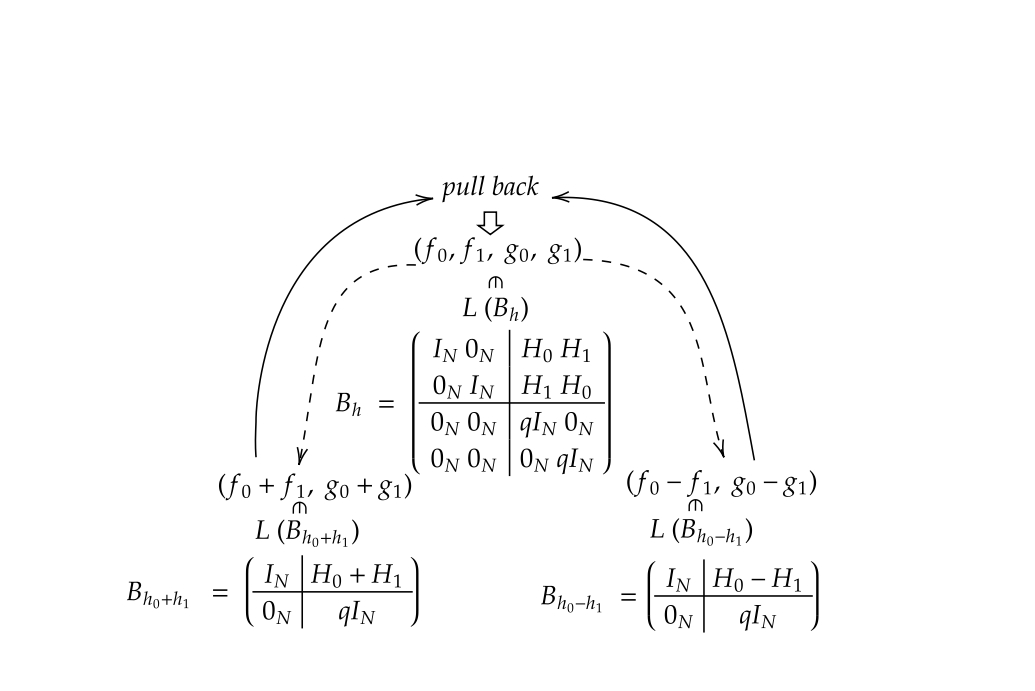

In [47]:
def get_reduction_matrices(h,n,q): 
    """
    Input: -the public key h
           -n,q: the paramteters that define the cryptosystem
    Output: the basis for the original lattices and the smaller lattices defines according to the
    homorphism
    """
    #n = int(n/2)
    FF =IntegerRing()
    H = get_GR_matrix(h,FF)
    H0 = H[:n, :n]
    H1 = H[n:2*n, :n]

    upper_right = H
    
    MS2 = MatrixSpace(FF, n,n)
    Identity = MS2.matrix(np.identity(n))
    Zero = MS2.matrix(np.zeros([n,n]))
    qIdentity =q*Identity
    #print(upper_right)
    upper_left = block_matrix(2, 2, [ Identity, Zero, Zero,  Identity])
    lower_left = block_matrix(2, 2, [ Zero, Zero, Zero, Zero])
    lower_right = block_matrix(2, 2, [  qIdentity, Zero,Zero,  qIdentity ])
    #upper_left = 
    H0pH1 = H0+H1
    H0mH1 =  H0-H1
    first_matrix = block_matrix(2, 2, [ Identity, H0pH1, Zero,  qIdentity])
    second_matrix = block_matrix(2, 2, [ Identity, H0mH1, Zero,  qIdentity])
    return block_matrix(2, 2, [ upper_left, upper_right, lower_left,lower_right]), first_matrix, second_matrix

In [48]:
t =get_reduction_matrices(h,n/2,q)

In [49]:
##Orginal lattice
print(t[0])

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0| 76  47  85  26  59 122  34  93 119  64  58  24  81   8]
[  0   1   0   0   0   0   0   0   0   0   0   0   0   0|  8  76  47  85  26  59 122  34  93 119  64  58  24  81]
[  0   0   1   0   0   0   0   0   0   0   0   0   0   0| 81   8  76  47  85  26  59 122  34  93 119  64  58  24]
[  0   0   0   1   0   0   0   0   0   0   0   0   0   0| 24  81   8  76  47  85  26  59 122  34  93 119  64  58]
[  0   0   0   0   1   0   0   0   0   0   0   0   0   0| 58  24  81   8  76  47  85  26  59 122  34  93 119  64]
[  0   0   0   0   0   1   0   0   0   0   0   0   0   0| 64  58  24  81   8  76  47  85  26  59 122  34  93 119]
[  0   0   0   0   0   0   1   0   0   0   0   0   0   0|119  64  58  24  81   8  76  47  85  26  59 122  34  93]
[  0   0   0   0   0   0   0   1   0   0   0   0   0   0| 93 119  64  58  24  81   8  76  47  85  26  59 122  34]
[  0   0   0   0   0   0   0   0   1   0   0   0   0   0| 34  93 119  64  58  24  81   8

In [50]:
##H0+H1
print(t[1])

[  1   0   0   0   0   0   0|169 166 149  84  83 203  42]
[  0   1   0   0   0   0   0| 42 169 166 149  84  83 203]
[  0   0   1   0   0   0   0|203  42 169 166 149  84  83]
[  0   0   0   1   0   0   0| 83 203  42 169 166 149  84]
[  0   0   0   0   1   0   0| 84  83 203  42 169 166 149]
[  0   0   0   0   0   1   0|149  84  83 203  42 169 166]
[  0   0   0   0   0   0   1|166 149  84  83 203  42 169]
[---------------------------+---------------------------]
[  0   0   0   0   0   0   0|128   0   0   0   0   0   0]
[  0   0   0   0   0   0   0|  0 128   0   0   0   0   0]
[  0   0   0   0   0   0   0|  0   0 128   0   0   0   0]
[  0   0   0   0   0   0   0|  0   0   0 128   0   0   0]
[  0   0   0   0   0   0   0|  0   0   0   0 128   0   0]
[  0   0   0   0   0   0   0|  0   0   0   0   0 128   0]
[  0   0   0   0   0   0   0|  0   0   0   0   0   0 128]


In [51]:
##H0-H1
print(t[2])

[  1   0   0   0   0   0   0|-17 -72  21 -32  35  41  26]
[  0   1   0   0   0   0   0|-26 -17 -72  21 -32  35  41]
[  0   0   1   0   0   0   0|-41 -26 -17 -72  21 -32  35]
[  0   0   0   1   0   0   0|-35 -41 -26 -17 -72  21 -32]
[  0   0   0   0   1   0   0| 32 -35 -41 -26 -17 -72  21]
[  0   0   0   0   0   1   0|-21  32 -35 -41 -26 -17 -72]
[  0   0   0   0   0   0   1| 72 -21  32 -35 -41 -26 -17]
[---------------------------+---------------------------]
[  0   0   0   0   0   0   0|128   0   0   0   0   0   0]
[  0   0   0   0   0   0   0|  0 128   0   0   0   0   0]
[  0   0   0   0   0   0   0|  0   0 128   0   0   0   0]
[  0   0   0   0   0   0   0|  0   0   0 128   0   0   0]
[  0   0   0   0   0   0   0|  0   0   0   0 128   0   0]
[  0   0   0   0   0   0   0|  0   0   0   0   0 128   0]
[  0   0   0   0   0   0   0|  0   0   0   0   0   0 128]


In [52]:
import numpy as np
from fpylll import IntegerMatrix, GSO, FPLLL, LLL
from fpylll.algorithms.bkz2 import BKZReduction

In [53]:
def reduction_algorithm(matrix, option):
    
    """
    matrix to reduce and an option for lattice reduction algorithm
    output: the reduced matrix according to the lattice reduction algorithm
    """
    
    status = "done"
    if(option == 0 ): ### LLL default
        #FPLLL.set_precision(200)
        #result = IntegerMatrix.from_matrix(matrix)
        #M = GSO.Mat(result)
        #_= M.update_gso()
        try:
            L = LLL.Reduction(GSO.Mat(matrix), delta=0.99, eta=0.501)
            L()
        except:
            status = "aborted"
    elif(option == 1): ###BKZ2 default
        #result = IntegerMatrix.from_matrix(matrix)
        #FPLLL.set_precision(200)
        #M = GSO.Mat(result, float_type="mpfr")
        # _= M.update_gso()
        try:
            beta = 40
            strategies = load_strategies_json(BKZ.DEFAULT_STRATEGY)
            param =  BKZ.Param(block_size=beta,strategies=strategies, flags=BKZ.AUTO_ABORT)
            BKZ2(LLL.Reduction(GSO.Mat(matrix)))(params = param)
        except:
            status = "aborted"
    elif(option == 2): #LLL float point mpfr
        try:
            FPLLL.set_precision(200)
            M = GSO.Mat(matrix, float_type="mpfr")
            _= M.update_gso()
            L = LLL.Reduction(M , delta=0.99, eta=0.501)
            L()
        except:
            status = "aborted"
        
    elif(option == 3):
        try:
      
            FPLLL.set_precision(200) ###BKZ2.2 float point
            M = GSO.Mat(matrix, float_type="mpfr")
            _= M.update_gso()
            beta = 40
            strategies = load_strategies_json(BKZ.DEFAULT_STRATEGY)
            param =  BKZ.Param(block_size=beta,strategies=strategies, flags=BKZ.AUTO_ABORT)
            BKZ2(M)(params = param)
        except:
            status = "aborted"
    
      
    return matrix,status

## Auxiliary functions

In [54]:
def is_it_zero(g):
    for i in range(len(g)):
        if(g[i] !=0):
            return False
    return True

In [55]:
def is_it_2_minus_2(f):
    n = len(f)
    for i in range(n):
        if(f[i]!= 0 and f[i]!=2 and f[i]!=-2):
            return False
    return True

In [56]:
def is_it_ternary_2_minus_2(f):
    n = len(f)
    for i in range(n):
        if(f[i]!= 0 and f[i]!=2 and f[i]!=-2 and f[i] !=1 and f[i]!=-1):
            return False
    return True

In [57]:
def divide_by_2(f):
    for i in range(len(f)):
        if(f[i]>0):
            f[i] = 1
        elif(f[i]<0):
            f[i] = -1
    return f

In [58]:
def get_norm(vec):
    s = 0
    for v in vec:
        s+=v^2
    return sqrt(s)
        

In [59]:
def check_rotation_return_ternary(f0,f1,g0,g1,q):
    if((not is_it_ternary_2_minus_2(f0)) or not(is_it_ternary_2_minus_2(f1))):
        return []

    #print("f0 =" , f0)
    #print("f1 = ", f1)
    #print("g0= ", g0)
    #print("g1 = ", g1)
    n = len(f1)
    F0 = add_vectors_with_center_lift(f0,f1,q)
    F1 = substract_vectors_with_center_lift(f0,f1,q)
    G0 = add_vectors_with_center_lift(g0,g1,q)
    G1 = substract_vectors_with_center_lift(g0,g1,q)
    if(is_it_2_minus_2(F0) and is_it_2_minus_2(F1) and is_it_2_minus_2(G0) and is_it_2_minus_2(G1)):
        return divide_by_2(F0)+divide_by_2(F1)+divide_by_2(G0)+divide_by_2(G1)
    
    return []

In [60]:
def is_it_2_m_2(F0,F1,G0,G1,q):
   
    if(is_it_2_minus_2(F0) and is_it_2_minus_2(F1) and is_it_2_minus_2(G0) and is_it_2_minus_2(G1)):
        return True
    return False

In [61]:
def add_vectors_with_center_lift(f0,f1,q):
    n = len(f0)
    s = [0]*n
    for i in range (0,n):
        s[i] = (f0[i]+f1[i]) % q
        if(s[i]>int(q/2)):
            s[i] = s[i]-q   
    return s  

In [62]:
def substract_vectors_with_center_lift(f0,f1,q):
    n = len(f0)
    s = [0]*n
    for i in range (0,n):
        s[i] = (f0[i]-f1[i]) % q
        if(s[i]>int(q/2)):
            s[i] = s[i]-q   
    return s  

In [63]:
def is_invertible(f,n,p):
    mat = get_GR_matrix(f,IntegerModRing(p))
    if(mat.is_invertible()):
            return True
    return False

In [64]:
def do_reduction_return_key(h, n,p,q ,option,threshold):
    #private_key_norm= np.sqrt(int(2*n/3)*4+1) 
    #print("The norm of the key should be: ", np.sqrt(int(2*n/3)*4+1))
    result = []
    k1 = []
    k2 = []
    secretkeynorm1 = []
    secretkeynorm2 = []
    k1_found = False
    k2_found = False
    dimension = n
    _,First,Second = get_reduction_matrices(h,n,q)
    F = IntegerMatrix.from_matrix(First)
  
    #F = Matrix(ZZ,First)
    S = IntegerMatrix.from_matrix(Second )
   
    #LLL.reduction(F)
    F, status = reduction_algorithm(F,option)
    #print("F after reduction: ")
    #print(F)
    
    if(status=="aborted"):
        return "aborted"
    #BKZ.reduction(F, o=BKZ.Param(block_size=2*n))
    
    #LLL.reduction(S)
    S, status = reduction_algorithm(S,option)
    #print("S after reduction")
    #print(S)
    if(status=="aborted"):
        return "aborted"
    #BKZ.reduction(S, o=BKZ.Param(block_size=2*n))
    #print(Big)
    
    norms1= {}
    for i in range(0,dimension):
        norms1[i] = F[i].norm()
        #print(norms[i])
    sorted_norms1 = sorted(norms1.items(), key=lambda x:x[1])
    #############################################
    
    norms2= {}
    for i in range(0,dimension):
        norms2[i] = S[i].norm()
        #print(norms[i])
    sorted_norms2 = sorted(norms2.items(), key=lambda x:x[1])
    ################################################
    
    #threshold1 = 3*private_key_norm

    #threshold2 = 3*private_key_norm
    ##################################################
    for i in range (dimension):
        if(sorted_norms1[i][1]>threshold):
            if(k1_found or k2_found):
                return [k1, secretkeynorm1, k2, secretkeynorm2]
            return "failure"
        #print("H0+H1: Checking vector at row: ", sorted_norms1[i][0])
        t = list(F[sorted_norms1[i][0]])
        f0 = t[:n]
        #print("f= ", f0)
        g0 = t[n:]
        #print("g= ", g0)
        #print("n= ,"n)
        #print("g_prime = ", Z_D_multiplay(h,f,q))
        if(not is_it_zero(g0)):
           
            #print(secretkey)
            
            for j in range (dimension):
                if(sorted_norms2[j][1]>threshold):
                    break
                #print("H0-H1: Checking vector at row: ", sorted_norms1[j][0])
                t = list(S[sorted_norms2[j][0]])
                f1 = t[:n]
                #print("f= ", f)
                g1 = t[n:]
                #print("g= ", g)
                #print("n= ,"n)
                #print("g_prime = ", Z_D_multiplay(h,f,q))
                if(not is_it_zero(g1)):
                    
                    F0 = add_vectors_with_center_lift(f0,f1,q)
                    F1 = substract_vectors_with_center_lift(f0,f1,q)
                    G0 = add_vectors_with_center_lift(g0,g1,q)
                    G1 = substract_vectors_with_center_lift(g0,g1,q)
#                     print(F0+F1)
                    if(is_invertible(F0+F1 ,n, p) and not(k1_found)):
                        #print("here")
                        k1 = F0+F1+ G0+G1
                        #print(centerd_lift_form(F0+F1+ G0+G1,q))
                        #print("f0 = ", f0)
                        #print("g0  =", g0)
                        #print("f1 = ", f1)
                        #print("g1 = ", g1)
                        #print("k1: ")
                        secretkeynorm1 = get_norm(k1)
                        k1_found = True
                        result.append(k1)
                        result.append(secretkeynorm1)
                    
                   
                    if (not(k2_found) and is_it_2_m_2(F0, F1,G0,G1,q)):
                        
                        f_prime = divide_by_2(F0)+divide_by_2(F1)
                        g_prime =divide_by_2(G0)+divide_by_2(G1)
                        if(is_invertible(f_prime,n,p)):
                            k2 = f_prime+g_prime
                            secretkeynorm2= get_norm(k2)
                            k2_found = True
                            result.append(k2)
                            result.append(secretkeynorm2)
                    if(k1_found and k2_found):
                        return result
        #return [f,g, secretkeynorm]
        if k1_found: 
            return result
    return "failure"

In [65]:
d = int(n/3)
option =0
threshold = 4*sqrt(4*d+1)
result = do_reduction_return_key(h, n/2,p,q ,option,threshold)
print(result)

[[-1, -2, -3, -1, 1, 0, -1, 1, 2, -1, 1, -1, 2, 1, -3, -1, 1, 0, 2, 0, -1, 1, 1, 1, -2, -2, 2, 1], sqrt(62)]


In [66]:
center_lift_form(ZCn_multiply(n,result[0],h,q),q)


[-3, -1, 1, 0, 2, 0, -1, 1, 1, 1, -2, -2, 2, 1]

In [67]:
# ZCn_multiply(n,f,h,q)

This is what is known as [Gentry's attack](https://link.springer.com/chapter/10.1007/3-540-44987-6_12).

In his original paper, Gentry elaborates his attack for a cyclic group of composite order $2^n$ for positive $n$. 

## A more generalized form
<a id="step3"></a>

Consider NTRU-like cryptosystems build on with considering the modulo $X^N +1$ instead of the $X^N-1$,
we can think of these constructions as a special case of the twisted GR-NTRU instead of GR-NTRU

** Twisted group ring: A twisted group ring $\mathcal{R}^{\lambda}\mathcal{G}$ of group $\mathcal{G}$ over the ring $\mathcal{R}$ corresponding to the 2-cocycle $\lambda$ is same as the group ring $\mathcal{R}\mathcal{G}$ as defined eariler but with a twisted multiplication given by
 \begin{equation}\label{product twisted group ring}
         \sum_{i=1}^{n}\alpha_ig_i \ast \sum_{i=1}^{n}\beta_ig_i = \sum_{i=1}^{n}\left(\sum_{g_hg_k = g_i}\alpha_h\beta_k\lambda(g_h,g_k)\right)g_i.
    \end{equation}


Further, the matrix representation of $a = \sum_{i=1}^n\alpha_{g_i}g_i\in R^{\lambda}G$ has the form}
\begin{equation}
    \textbf{M}_{RG}^{\lambda}(a) = \begin{pmatrix}
\lambda(g_1,g_1^{-1}g_1)\alpha_{g_1^{-1}g_1} & \lambda(g_1,g_1^{-1}g_2)\alpha_{g_1^{-1}g_2} & \ldots\ldots & \lambda(g_1,g_1^{-1}g_n)\alpha_{g_1^{-1}g_n}\\
\lambda(g_2,g_2^{-1}g_1)\alpha_{g_2^{-1}g_1} & \lambda(g_2,g_2^{-1}g_2)\alpha_{g_2^{-1}g_2} & \ldots\ldots & \lambda(g_2,g_2^{-1}g_n)\alpha_{g_2^{-1}g_n}\\
\vdots & \vdots & \ddots & \vdots\\
\lambda(g_n,g_n^{-1}g_1)\alpha_{g_n^{-1}g_1} & \lambda(g_n,g_n^{-1}g_2)\alpha_{g_n^{-1}g_2} &\ldots\ldots& \lambda(g_n,g_n^{-1}g_n)\alpha_{g_n^{-1}g_n}\\
\end{pmatrix},
\end{equation}

We can think of GR-NTRU as a special case of the twisted GR-NTRU with $\lambda =1$  for 
all $g_i, g_j \in \mathcal{G}$.

Now, for NTRU scheme built over the ring $\mathbb{Z}[x]/(x^N+1)$, we can see that
\begin{align*}
\lambda(x^i,x^j) &=
\begin{cases}
    -1,& \text{for } i+j>=N\\
    1,              & \text{otherwise } 
\end{cases}
\end{align*}

In [68]:
def get_lambda_cyclic(n, index1, index2):
    """
    Input: -n: the order of the group
           -index1, index2: the indicies of the element for some group
    """
    lamda = 1
    if (index1+index2>=n):
        lamda =-1
    return lamda
        

In [69]:
def get_lambda(n, index1, index2,option):
    """
    Input: -n: the order of the group
           -index1, index2: the indicies of the element for some group
           -option: refers to the group
            
    Output: the index of the output when multiplying the group elements at positions index1, index2
    """
    if option==0:
        lamda = get_lambda_cyclic(n, index1, index2)
        
    elif option==2:
        lamda = get_lambda_quaternion(n,index1, index2)

    return lamda

In [70]:
def get_twisted_GR_matrix(element,FF =IntegerRing(),option=0):
    """
    Input:  -element: an element of the group-ring
            -option: refers to the group
    Output: -the matrix of the group-ring
    
    This function uses the get_inverse function according to the group   
    """
    n = len(element)
    mat = []
    a = [0]*n
    for i in range(n):
        inv = get_inverse(n,i,option)
        for j in range(n):
            index = multiplication_table(n,inv,j,option)
            lamda = get_lambda(n,i,index,option)
            a[j] = element[index]*lamda
        #print(a)
        mat.append(copy(a))
    ###return matrix with entries from IntegerRing    
    MS2 = MatrixSpace(FF, n, n)
    A = MS2.matrix(mat)
    return A

In [71]:
get_twisted_GR_matrix([1,4,1,5,6,8,12,15],FF=IntegerModRing(),option=0)

[  1   4   1   5   6   8  12  15]
[-15   1   4   1   5   6   8  12]
[-12 -15   1   4   1   5   6   8]
[ -8 -12 -15   1   4   1   5   6]
[ -6  -8 -12 -15   1   4   1   5]
[ -5  -6  -8 -12 -15   1   4   1]
[ -1  -5  -6  -8 -12 -15   1   4]
[ -4  -1  -5  -6  -8 -12 -15   1]

## Towards Specializations, again!!
<a id="step4"></a>


## DiTRU: GR-NTRU over dihedral group
<a id="Ditru"></a>

As we have introduced GR-NTRU as a general framework to characterize NTRU-variant.

We will introduce now a new construction of GR-NTRU upon the dihedral group as a noncommutative NTRU-like scheme.

Let $D_N = \left<x,y~|~x^N = y^2  = 1, xy = yx^{N-1}\right>$ be dihedral group of order $2N$. 
{DiTRU} is a GR-NTRU over the group ring
\begin{equation}
   {  \mathbb{Z} D_N \approx \frac{\mathbb{Z}[x,y]}{(x^N-1,y^2-1,xy - yx^{N-1})}.}
\end{equation}
Any element of group ring $\mathbb{Z} D_N$ can be written in the form $f = f_0(x)+yf_1(x)$, 

where $f_0(x)$ and $f_1(x)$ are elements of the ring $\mathbb{Z} C_N\approx \mathbb{Z}[x]/(x^N-1)$.



Let $h = h_0(x)+yh_1(x)$ be the public key of {DiTRU} corresponding to the private key $(f,g) = (f_0(x)+yf_1(x),g_0(x)+yg_1(x))$, and 
\begin{equation}
{\textbf{H}_{\textbf{dihedral}} = \textbf{M}_{\mathbb{Z} D_N}(h)}
\end{equation}
be the matrix representation of $h$. Since $f\ast\textbf{H}_{\textbf{dihedral}} = g \pmod q,$ {DiTRU} can be associated to the lattice $\mathcal{L}(\textbf{B}_{\textbf{dihedral}})$ that contains $(f,g)$, generated by the basis matrix
\begin{equation}
    \label{matrixDN}
{\textbf{B}_{\textbf{dihedral}} = \begin{pmatrix}
        \textbf{I}_{2N}  & \textbf{H}_{\textbf{dihedral}}\\
        \textbf{0}_{2N} & q\textbf{I}_{2N}
    \end{pmatrix}.}
\end{equation}
 

In [72]:
# orginal_list = [1,x,x^2, ......,x^{N-1}, y, yx, ........yx^{N-1}]
# inverse_list = [1,x^{N-1},x^{N-2},..x,   y, yx ,........yx^{N-1}]


def get_inverse_dihedral(n, index):
    """
    Input: - index: the index of the group element (indexing start from zero)
           - n: the order of the cyclic group = 2N
    Output: the index of the inverse according to the group 
    for example: the invese of 1 is n-1(mean inverse of x is x^{N-1})
    in the cyclic group
    
    """
    
    if index==0:
        return 0 ##invese of 1
    elif index<n/2:
        return (n/2-index)
    else: return index

In [73]:
def multiplication_table_dihedral(n, index1, index2):
    """
    Input:  -n=2N: the order of the dihedral group
            -index1, index2: the indicies of the element for cyclic group
    Output: the index of the output when multiplying the group elements at positions index1, index2
    """
    N = n/2
    if (index1 < N and index2<N):
        index = (index1+index2)%N
        
    elif (index1<N and index2>=N):
        index = (N+(N-index1+index2)%N)
        
    elif (index1>=N and index2<N):
        index = N+(index2+index1)%N
        
    else:
        index = (N-(index1-N) + (index2-N))%N
        
    return index

In [74]:
get_GR_matrix([1,2,3,11,19,13],IntegerModRing(),1)

[ 1  2  3 11 19 13]
[ 3  1  2 19 13 11]
[ 2  3  1 13 11 19]
[11 19 13  1  2  3]
[19 13 11  3  1  2]
[13 11 19  2  3  1]

## Hint some other examples
<a id="examples"></a>

Some proposals in literature have been introduced based on Quaternion Algebra.

Generally speaking, Real quaternion denoted by $\mathbb{H}$ is a vector space of dimension $4$ over $\mathbb{R}$.

Typically, the elements of $H$ are denoted by the expression $\alpha+ \beta.i+ \gamma.j+ \delta.k$, where $\alpha, \beta, \gamma, \delta \in \mathbb{R}$.

A quaternion can be show by ordinary vector notations $q=<\alpha, \beta, \gamma, \delta> $ over $\mathbb{R}$.


Quaternion algebra can be generalized by replacing the field of real number $\mathbb{R}$ by any arbitary field $\mathbb{F}$(or ring $\mathcal{R}$).



As a vector space, addition and scalar multiplication are defined by ordinary element-wise vector additon and scalar multiplication.

However, multiplication of two quaternion shall be done according to the following rules

$$i^2=j^2=k^2=-1 \text{ and } ij = -ji=k$$

Assume $\mathbb{F}$ is an arbitary field and the characteristic of $\mathbb{F}$ is not 2. Then, the quaternion algebra $\mathbb{A}$ can be defined over $\mathbb{F}$ as

$$\mathbb{A}= \left( \frac{a,b}{\mathbb{F}} \right)$$
$$=\{\alpha+ \beta.i+ \gamma.j+\delta.k | \alpha, \beta, \gamma, \delta \in \mathbb{F}, i^2=a, j^2=b, ij=-ji=k \}$$

QTRU has been proposed based on $$\mathbb{A}= \left( \frac{-1,-1}{\mathbb{Z}[x]/(x^N-1)} \right)$$ 

One can think of [QTRU](https://eprint.iacr.org/2009/386) as a group-ring NTRU with group $G=\frac{\mathbb{Z}}{2\mathbb{Z}} \times \frac{\mathbb{Z}}{2\mathbb{Z}} $ and ring as $\mathcal{R}=\mathbb{Z}[x]/(x^N-1)$.

In [75]:
# orginal_list = [1,i,j,k]
# inverse_list = [1, i, j,-k]


def get_inverse_quaternion(n, index):
    """
    Input: - index: the index of the group element (indexing start from zero)
           - n: is 4
    Output: the index of the inverse according to the group 
    
    
    """
    
    return index

In [76]:
def multiplication_table_quaternion(n, index1, index2):
    """
    Input:  -n=2N: the order of the dihedral group
            -index1, index2: the indicies of the element for cyclic group
    Output: the index of the output when multiplying the group elements at positions index1, index2
    """
    indices = [1,2,3]
    if (index1==0):
        index= index2
    elif (index2==0):
        index = index1
    elif(index1==index2):
        index =0
    else:
        indices.remove(index1)
        indices.remove(index2)
        index = indices[0]
      
    return index

In [77]:
def get_lambda_quaternion(n, index1, index2):
    """
    Input: -n: the order of the group
           -index1, index2: the indicies of the element for some group
    """
    lamda = 1
#     print("index 1:", index1)
#     print("index 2: ", index2)

    if(index1==1): ###for i
        
        if(index2==1 or index2==3): ###i^2 or ik
            lamda = -1 ##i^2
        elif(index2==3): 
            lamda = -1 
            
        
    elif(index1==2): ###for j
        
        if(index2==1 or index2==2): ##ji or j^2
            lamda =-1  ##j^2
            
        
    elif(index1==3):
        if(index2==2 or index2==3): ##kj or k^2
            lamda =-1##kj

    
        
    return lamda

In [78]:
t = get_twisted_GR_matrix([1,3,4,6],FF=IntegerModRing(),option=2)

In [79]:
print(t)

[ 1  3  4  6]
[-3  1 -6  4]
[-4  6  1 -3]
[-6 -4  3  1]


In [80]:
alpha = get_GR_matrix([3,4,5], IntegerModRing(), 0)
beta  =  get_GR_matrix([1,2,3], IntegerModRing(), 0)
gamma = get_GR_matrix([3,4,5], IntegerModRing(), 0)
delta = get_GR_matrix([5,4,5], IntegerModRing(), 0)

#### Task1 modify the twisted GR-NTRU procedure so that each entry is coming from the new ring. I.e., the new construction is a matrix of matrices now.

In [81]:
##solution

####  Task2: [BQTRU](https://link.springer.com/article/10.1007/s10623-017-0451-4) is another construction based on quaternion algebra and has been proposed based on $$\mathbb{A}= \left( \frac{1,1}{\mathbb{Z}[x,y]/(x^N-1, y^N-1)} \right).$$
Can you represnt it using GR-NTRU or twisted GR-NTRU?

In [77]:
##solution